<a href="https://colab.research.google.com/github/alex-bolshunov/Plant-Disease-Detection/blob/main/smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [326]:
!curl "https://raw.githubusercontent.com/alex-bolshunov/Plant-Disease-Detection/refs/heads/main/data/plants_potatos.csv" -o plants.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0  41.9M      0 --:--:-- --:--:-- --:--:-- 42.0M


In [327]:
N_FEATURES = 512
LABELS = ('Early_blight', 'Late_blight', 'Healthy')
CLASS_COUNTS = (1000,1000,250)

In [328]:
df = pd.read_csv("plants.csv")

In [329]:
df.loc[:, "label"] = df.loc[:, "label"].apply(lambda x: x[9:].capitalize())

In [330]:
X = df.iloc[:, :N_FEATURES]
y = df.iloc[:, N_FEATURES:]

In [331]:
counts = y.value_counts()

In [332]:
size = df.shape[0]
heights = counts.values
x_tags = [index_tuple[0] for index_tuple in counts.index]

In [333]:
max_height = np.max(np.round(heights, 3))

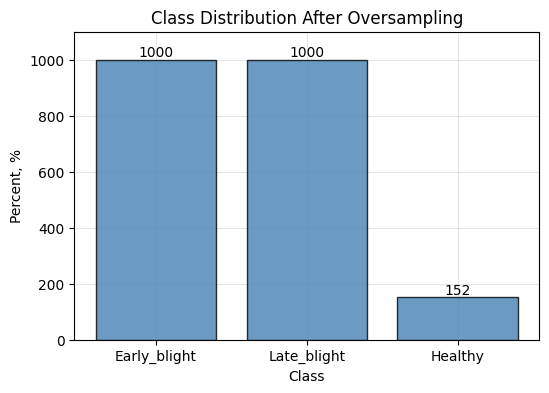

In [334]:
fig, ax = plt.subplots(figsize = (6, 4))

bars = ax.bar(x_tags, heights, color = "steelblue", edgecolor = "black", alpha = 0.8, zorder = 3)

for bar in bars:
  bar_height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2, bar_height, f'{np.round(bar_height, 3)}', ha='center', va='bottom', fontsize=10)

ax.grid(alpha = 0.3, zorder = 1)
ax.set_ylim((0, max_height * 1.1))
ax.set_xlabel("Class")
ax.set_ylabel("Percent, %")
plt.title("Class Distribution After Oversampling")
plt.savefig("class_distribution_after.jpg", dpi = 300)
plt.show();

In [335]:
proportions_dict = {name:value for name, value in zip(LABELS, CLASS_COUNTS)}

smote = SMOTE(sampling_strategy = proportions_dict, random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [336]:
df = pd.DataFrame(X_resampled).join(pd.DataFrame(y_resampled, columns=["label"]))

In [337]:
counts = y_resampled.value_counts()

In [338]:
size = df.shape[0]
heights = counts.values
x_tags = [index_tuple[0] for index_tuple in counts.index]

In [339]:
max_height = np.max(np.round(heights, 3))

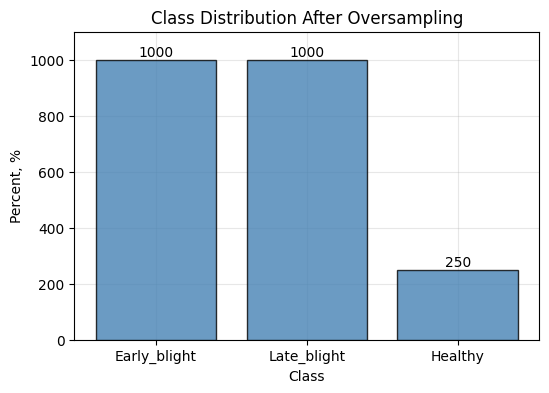

In [340]:
fig, ax = plt.subplots(figsize = (6, 4))

bars = ax.bar(x_tags, heights, color = "steelblue", edgecolor = "black", alpha = 0.8, zorder = 3)

for bar in bars:
  bar_height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2, bar_height, f'{np.round(bar_height, 3)}', ha='center', va='bottom', fontsize=10)

ax.grid(alpha = 0.3, zorder = 1)
ax.set_ylim((0, max_height * 1.1))
ax.set_xlabel("Class")
ax.set_ylabel("Percent, %")
plt.title("Class Distribution After Oversampling")
plt.savefig("class_distribution_after.jpg", dpi = 300)
plt.show();

In [341]:
#save df
df.to_csv("dataframe_resampled.csv", index = False)